In [1]:
# подключаем библиотеки для работы с данными и графикой
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# переменные для настройки графиков
large = 22; med = 16; small = 12
# параметры графиков
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
# обновляем параметры
plt.rcParams.update(params)
# выбираем стили оформления
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("white")

## Точечный график
Это один из основных графиков в работе аналитика данных. Он показывает взаимосвязь между двумя переменными, например между ценой и количеством продаж одного и того же товара в разных магазинах города. Каждая точка на графике — это пересечениие двух значений переменных. Глядя на расположение и группировку этих точек, можно сделать выводы, в каких случаях одно связано с другим.

Часто на графике рисуют несколько точечных графиков, где каждый набор данных показан своим цветом. Иногда это помогает найти связь между разными данными и сделать правильные выводы.

В нашем случае мы будем смотреть на данные демографического исследования провинциальной Америки (Midwest): как там связано население и площадь определённого графства (по-английски — county, по-нашему — что-то вроде городского округа).

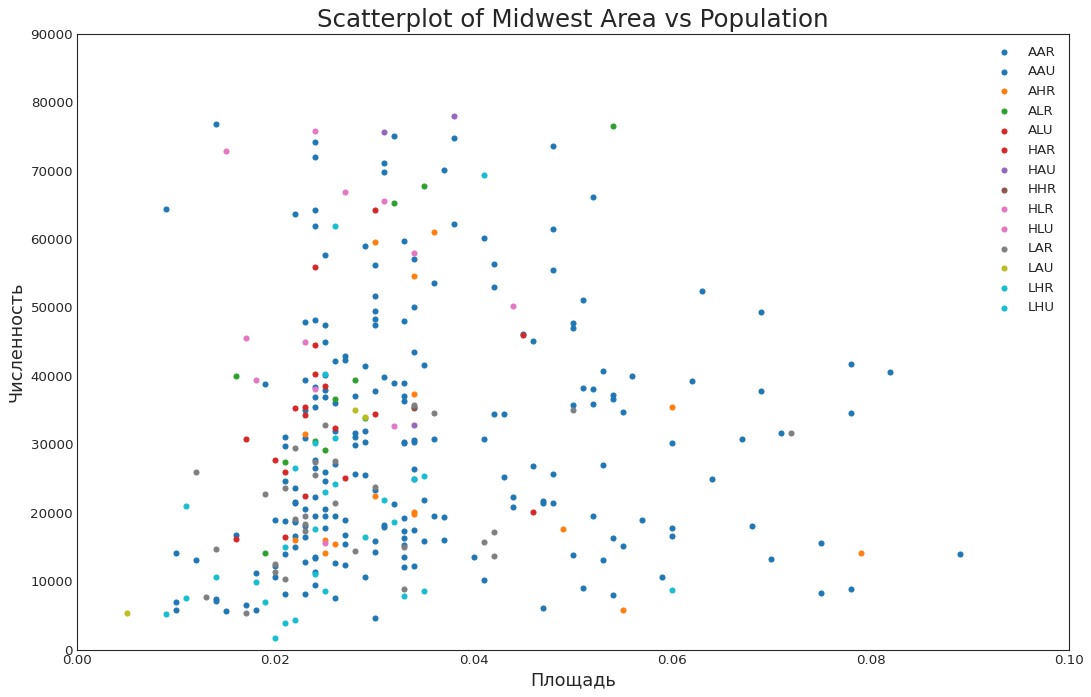

In [2]:
# берём исходные данные из файла
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# берём столько категорий и цветов, сколько элементов в разделе ['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# рисуем график для каждой категории
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
# перебираем все значения и ставим точки на графике
for i, category in enumerate(categories):
    # указываем, что это точечный график
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, color=colors[i], label=str(category))

# добавляем разметку и подписи
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Площадь', ylabel='Численность')

# разметка графиков
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
# добавляем название к графику
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
# рисуем точечный график
plt.legend(fontsize=12)    

plt.savefig('images/scatterplot.png')

plt.show()

## Парный график
Если нужно полноценно и со всех сторон изучить связь одних данных с другими, используют парный график.

Мы возьмём встроенный в библиотеку датасет про лепестки ириса. График покажет связь между тремя сортами ириса (setosa, versicolor и virginica) и длиной их лепестков (sepal и petal). Если по-человечески это потом расшифровать, вы поймёте, какие лепестки у каких сортов ириса бывают и как одни отличить от других.

Парный график будет визуализизирован двумя способами: точками данных и графиком частотности каких-то данных. Точки — понятно: вот есть конкретные образцы ириса, вот такие у него лепестки. А частотность интересна: благодаря ей можно увидеть, насколько часто какие-то значения встречаются в каком-то диапазоне. Например, в самой первой ячейке будет видно, что у сорта setosa длина лепестка Sepal чаще всего маленькая, а у versicolor и virginica бывают разные, но в целом они подлиннее. Это, получается, выводы по одному конкретному измерению данных.

/home/romauov/anaconda3/envs/env39/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x640 with 0 Axes>

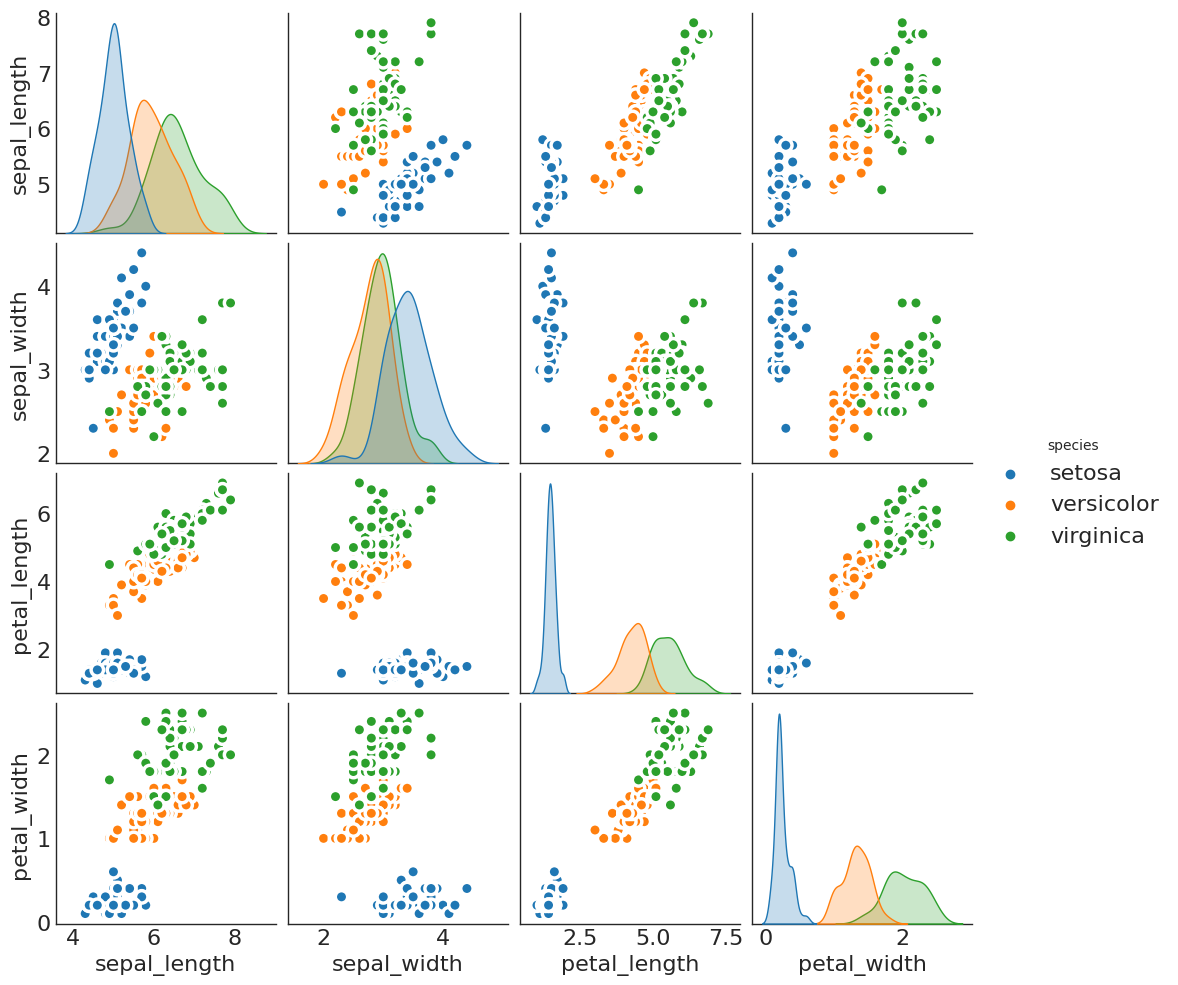

In [3]:
# берём исходные данные из файла
df = sns.load_dataset('iris')

# формируем и рисуем график
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

plt.savefig('images/pairplot.png')

plt.show()

## Расходящиеся столбцы
Если нужно показать положение каждого раздела относительно чего-то общего, используют расходящиеся столбцы. По ним сразу понятно, как данные располагаются друг относительно друга и нет ли там каких-то аномалий или нестыковок.

Сейчас посмотрим, каково расхождение пробега в милях на одном галлоне топлива (это примерно 4 литра). Мили и галлоны у нас из-за того, что датасет — американский, а там расход топлива измеряют не в литрах на сотню километров, а в том, сколько миль проедет машина на одном галлоне топлива. Мы построим график, который покажет машины со средним запасом хода и машины, которые могут проехать больше или меньше миль на одном галлоне топлива. Чем выше показатель — на столько миль больше эта машина проедет относительно среднего значения.

Например, мы сразу увидим, что у Ferrari Dino — средний из всех показатель такого запаса хода, а Toyota Corolla проедет на 2 мили больше на том же галлоне топлива.

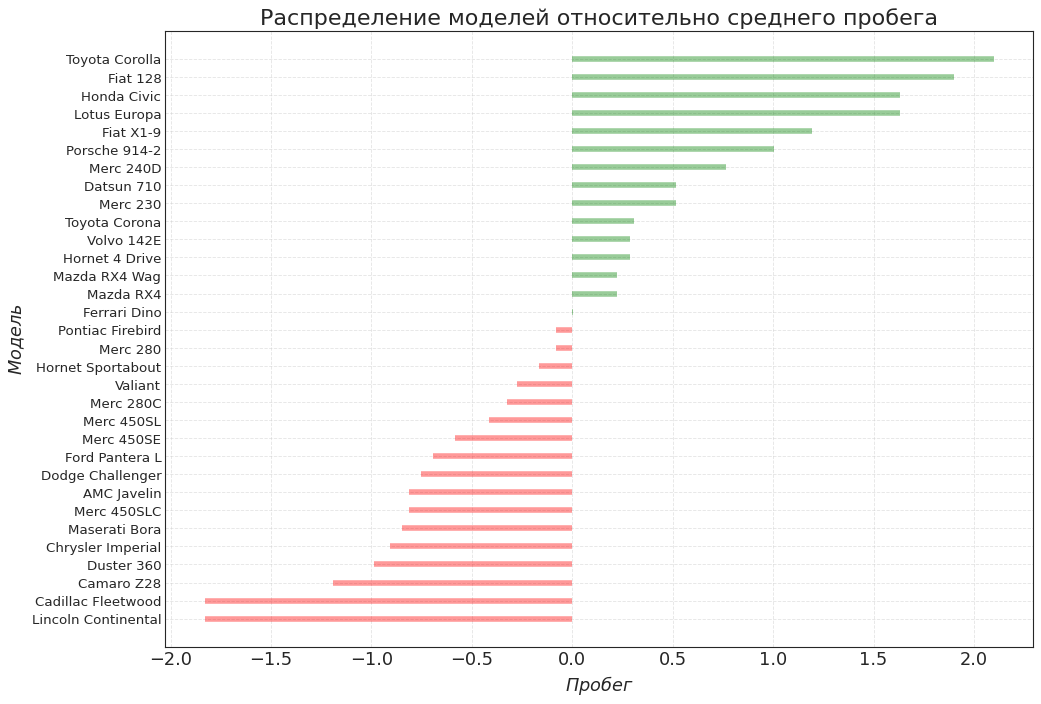

In [4]:
# берём исходные данные из файла
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
# считаем пробег
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
# выбираем цвет
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
# сортируем значения
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# готовим графие
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# подписи осей
plt.gca().set(ylabel='$Модель$', xlabel='$Пробег$')
plt.yticks(df.index, df.cars, fontsize=12)
# название графика
plt.title('Распределение моделей относительно среднего пробега', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
#сохраняем изображение с графиком
plt.savefig('images/divergent_bars.png')
# показываем график
plt.show()

## Упорядоченная гистограмма
Эта визуализация нужна, когда нужно быстро окинуть взглядом какой-то набор данных и получить первое представление — что там происходит и чему равны значения на разных позициях. Например, так мы можем сразу найти автопроизводителей с самым большим запасом хода относительно топлива:

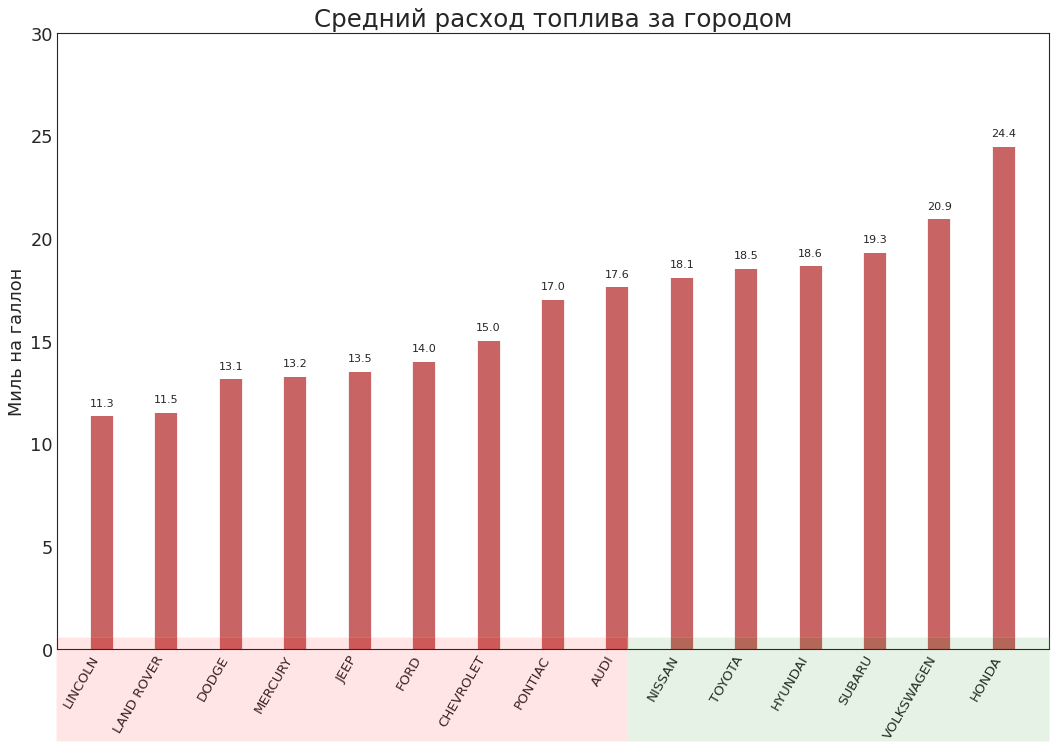

In [5]:
# берём исходные данные из файла
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# отбираем расход топлива по производителям
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean(numeric_only=True))
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# подключаем модуль из библиотеки
import matplotlib.patches as patches
# настраиваем общий вид графика
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# добавляем подписи
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# названия осей и значения
ax.set_title('Средний расход топлива за городом', fontdict={'size':22})
ax.set(ylabel='Миль на галлон', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# формируем зелёную и красную зоны
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
# добавляем всё на график и показываем его
fig.add_artist(p1)
fig.add_artist(p2)

plt.savefig('images/sortedhist.png')

plt.show()

## График «До — после»
Есть график, который показывает состояние «до» и «после» и динамику этих изменений. С помощью такого графика легко увидеть общие тренды и некоторые аномалии. Например, сразу видно, что за 5 лет ВВП на душу населения выросло во всех регионах, кроме Азии, — там он показал спад. Почему и как это произошло — следующая задача аналитиков, но зато сразу понятно, на что обратить внимание.

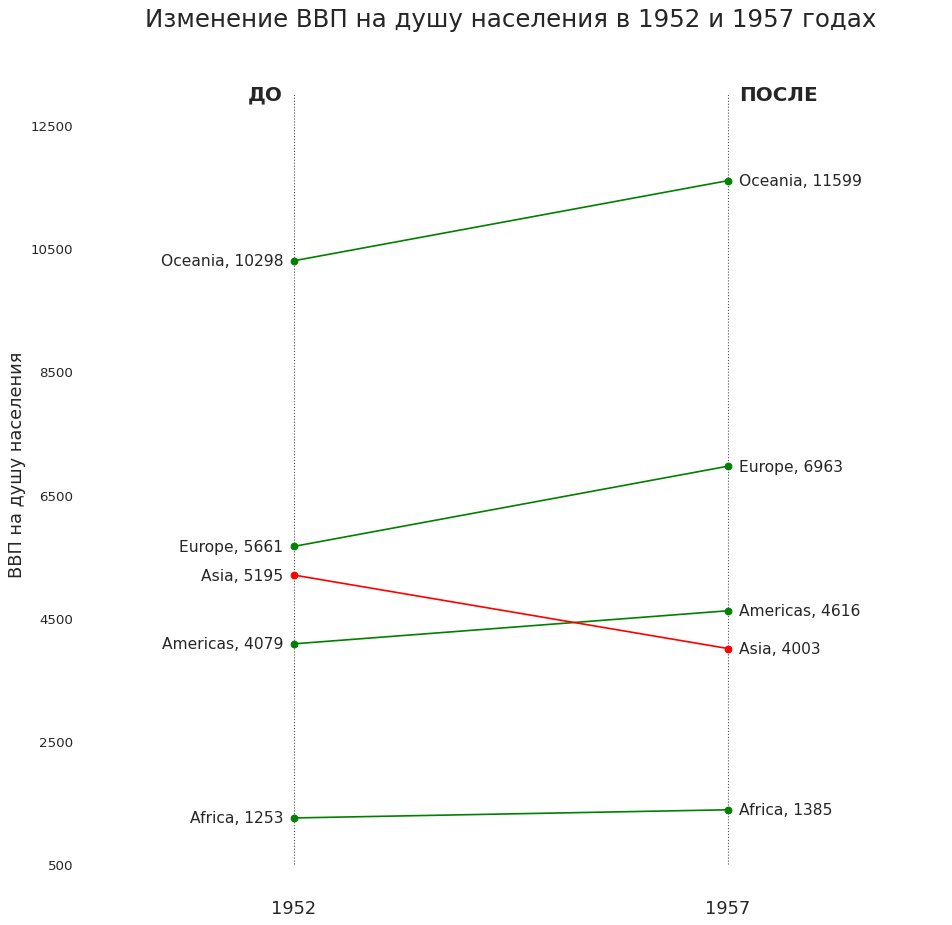

In [6]:
# подключаем нужный модуль из графической библиотеки
import matplotlib.lines as mlines
# берём исходные данные из файла
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

# добавляем надписи на колонки До и После
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# рисуем линии
def newline(p1, p2, color='black'):
    ax = plt.gca()
    # в зависимости от роста или падения рисуем зелёную или красную линии
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

# готовим график
fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# рисуем вертикальные линии
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# ставим точки начала и конца в нужных местах на линиях
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# добавляем надписи к каждой точке слева и справа
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# добавляем надписи ДО и ПОСЛЕ
ax.text(1-0.05, 13000, 'ДО', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'ПОСЛЕ', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# оформляем график
ax.set_title("Изменение ВВП на душу населения в 1952 и 1957 годах", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='ВВП на душу населения')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# убираем рамку вокруг графика
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
# сохраняем изображение с графиком
plt.savefig('images/before_after.png')
# показываем, что получилось
plt.show()

## График плотности

Этот график используется, когда нужно визуализировать то, как распределяются значения переменных. Если их сгруппировать по одному параметру, можно проверить взаимосвязь между ним и другим параметром. Например, вот как меняется среднее количество пробега миль на галлон в зависимости от количества цилиндров в машине.

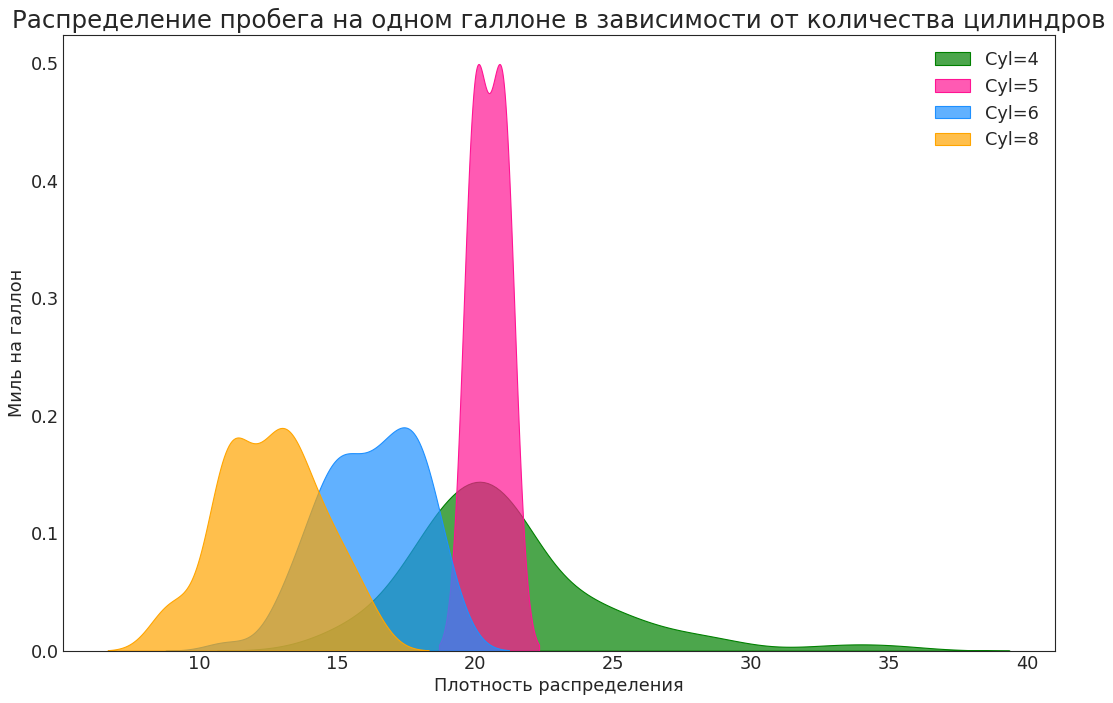

In [7]:
# берём исходные данные из файла
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# готовим график
plt.figure(figsize=(16,10), dpi= 80)
# группируем по количеству цилиндров
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], fill=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], fill=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], fill=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], fill=True, color="orange", label="Cyl=8", alpha=.7)

# добавляем общую надпись
plt.title('Распределение пробега на одном галлоне в зависимости от количества цилиндров', fontsize=22)
# подписываем оси
plt.gca().set(xlabel='Плотность распределения', ylabel='Миль на галлон')
# добавляем легенду
plt.legend()
# сохраняем изображение с графиком
plt.savefig('images/density.png')
# выводим график
plt.show()

## Joy-график или карта распределения
Joy-график показывает плотности распределения разных групп данных. Особенность графика в том, что значения одних данных могут перекрывать визуально другие, но это не мешает видеть всю картину в целом.



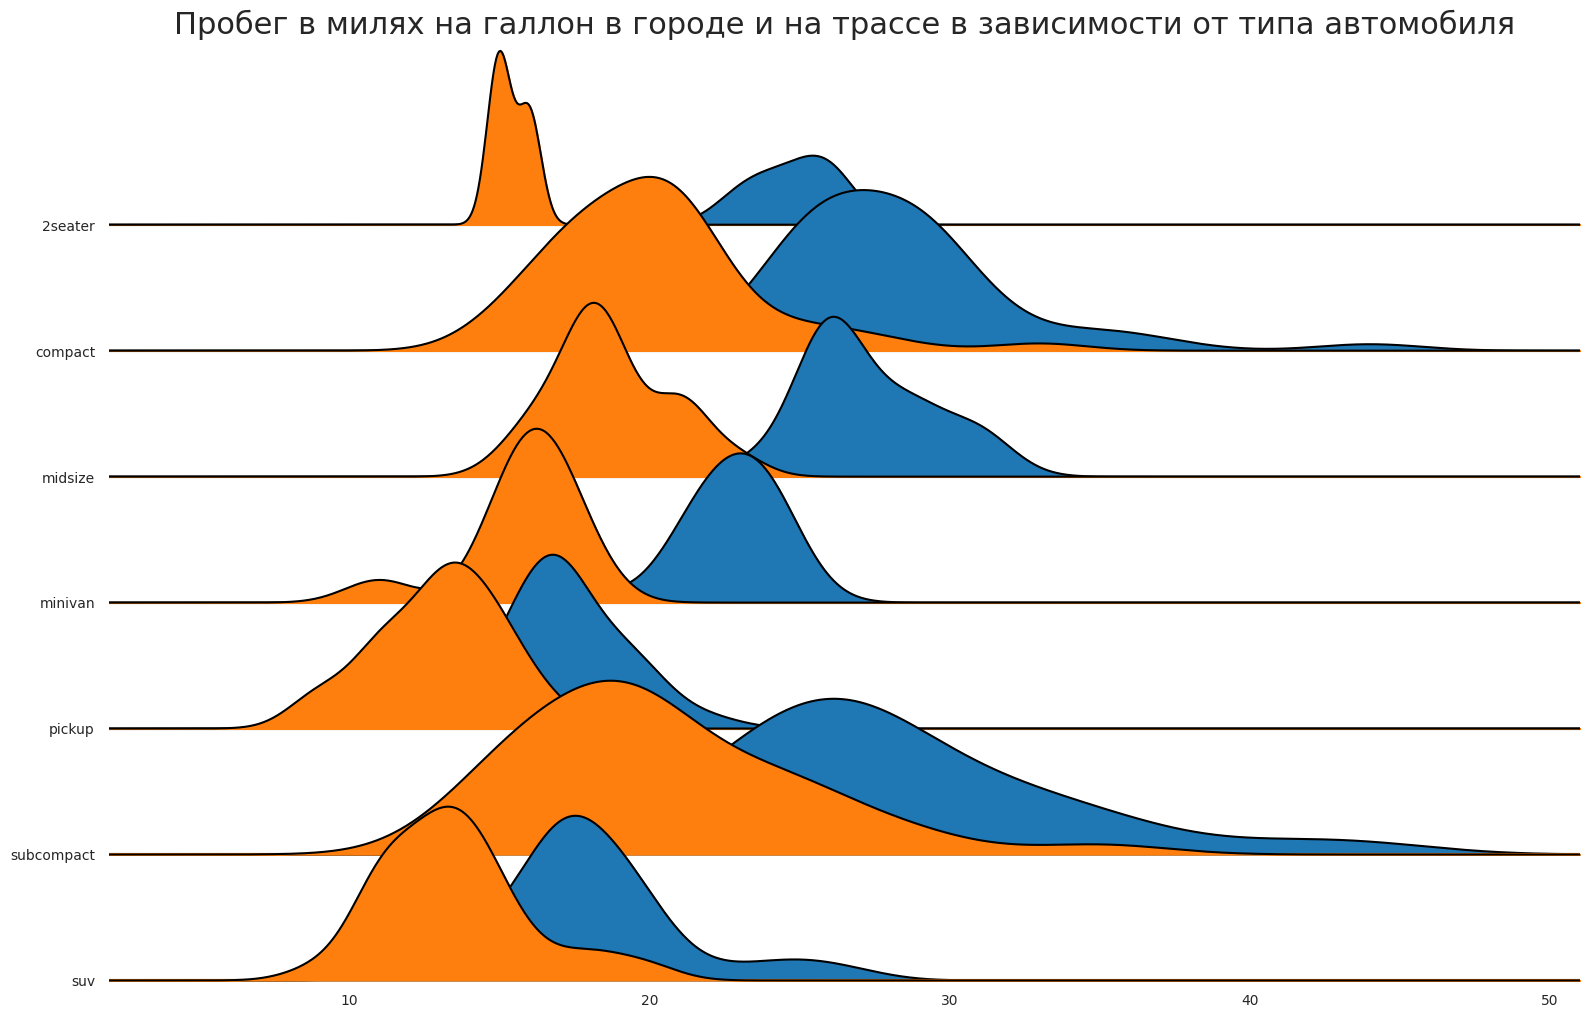

In [8]:
mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# подключаем библиотеку для графика
import joypy

# группируем данные по запасу хода на галлон на трассе и в городе
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own')

# добавляем надпись
plt.title('Пробег в милях на галлон в городе и на трассе в зависимости от типа автомобиля', fontsize=22)
# сохраняем изображение с графиком
plt.savefig('images/distribution.png')
# выводим график
plt.show()

## Гистограмма для категорий
Гистограмма категориальной переменной показывает, как распределяется частота этой переменной. Если раскрасить категории в разные цвета, можно увидеть, как они распределяются по разным переменным в зависимости от их значения.

С помощью гистограмм для категорий можно посмотреть, например, как разные производители автомобилей выпускают определённые типы машин:

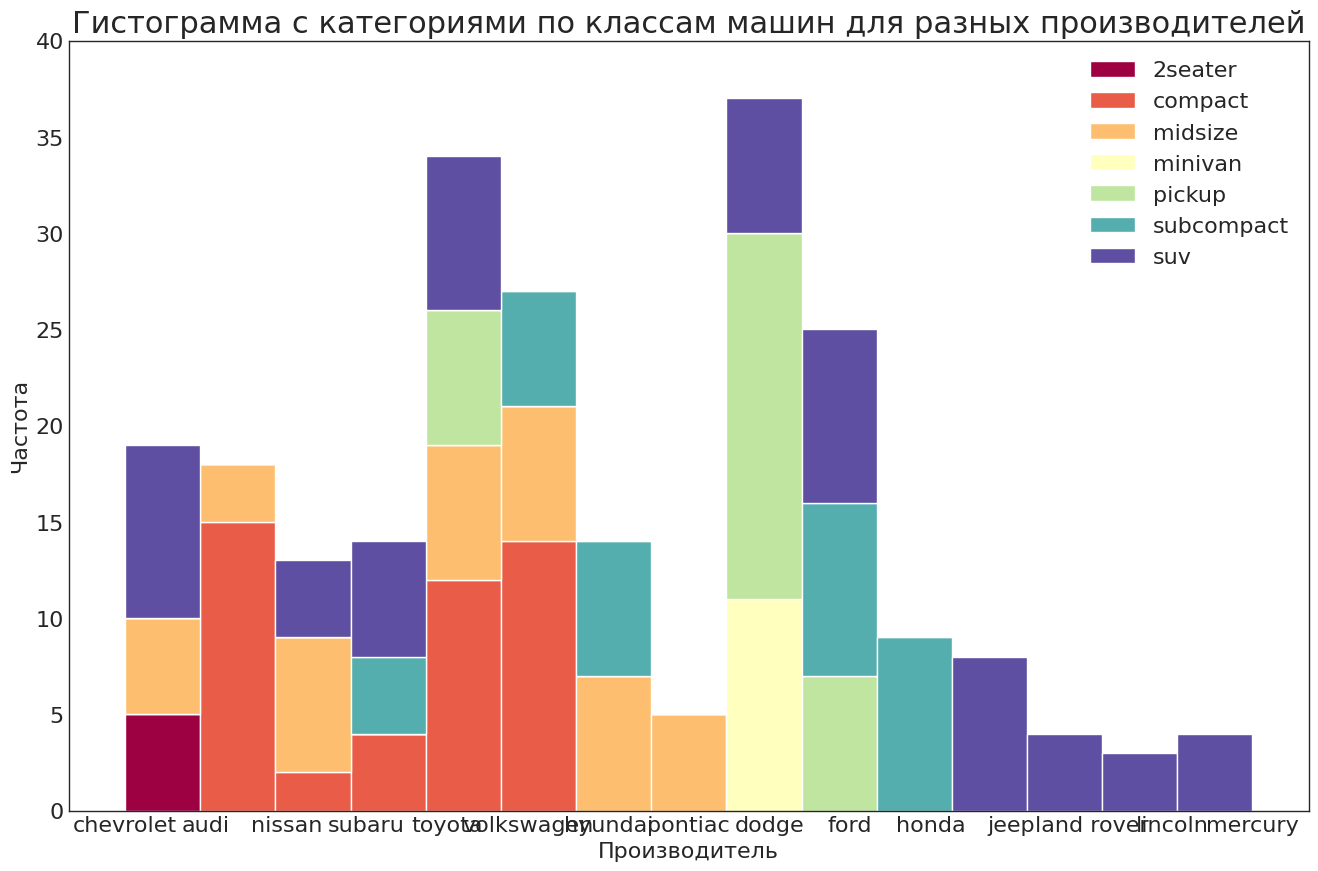

In [9]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# указываем данные, с которыми будем работать
x_var = 'manufacturer'
groupby_var = 'class'
# готовим данные
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# формируем цвета и категории
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# добавляем легенду
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
# и общую надпись
plt.title(f"Гистограмма с категориями по классам машин для разных производителей", fontsize=22)
# подписываем оси
plt.xlabel('Производитель')
plt.ylabel("Частота")
plt.ylim(0, 40)
# сохраняем изображение с графиком
plt.savefig('images/cat_hist.png')
# выводим график
plt.show()

## Временные ряды с пиками и впадинами
Такой способ отображения данных показывает все пики и впадины, а также отмечает отдельно значимые события, которые выбиваются из соседних значений. С помощью такого графика можно наглядно проследить, как менялся в течение сезона пассажиропоток в авиации: явный рост пассажиров в марте и июле и сильный спад зимой.

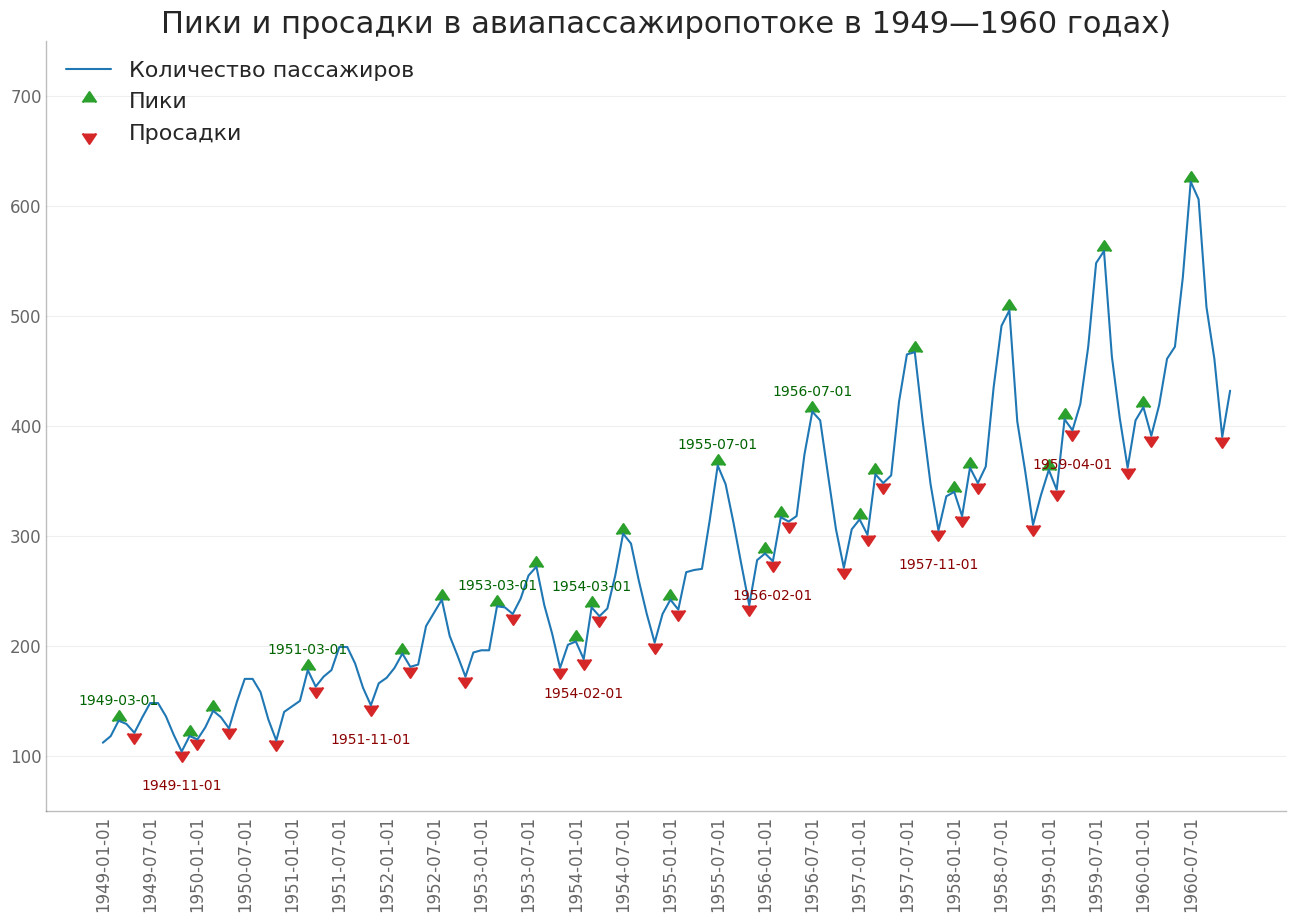

In [10]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

# получаем пики 
data = df['value'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1
# и падения
doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# готовим график
plt.plot('date', 'value', data=df, color='tab:blue', label='Количество пассажиров')
# добавляем указатели на пики и провалы
plt.scatter(df.date[peak_locations], df.value[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Пики')
plt.scatter(df.date[trough_locations], df.value[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Просадки')

# подписываем указатели
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.value[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.value[t]-35, df.date[t], horizontalalignment='center', color='darkred')

# формируем разбивку по годам
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
# добавляем общую надпись
plt.title("Пики и просадки в авиапассажиропотоке в 1949—1960 годах)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# настраиваем внешний вид границ графика
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

# добавляем легенду
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
# сохраняем изображение с графиком
plt.savefig('images/minmax_timerows.png')
# выводим график
plt.show()

## Диаграмма площади 
Эта диаграмма показывает, как ведут себя два ряда данных друг относительно друга. Особенность диаграммы в том, что на ней явно видно пересечение закрашенных графиков, что позволяет оценить влияние одной переменной на другую.

Например, можно построить диаграмму, которая покажет зависимость среднего уровня сбережений (какой процент от дохода человек откладывает в копилку) от длительности безработицы. На графиках видно, что чем дольше длится безработица, тем меньший процент сбережений откладывается про запас.

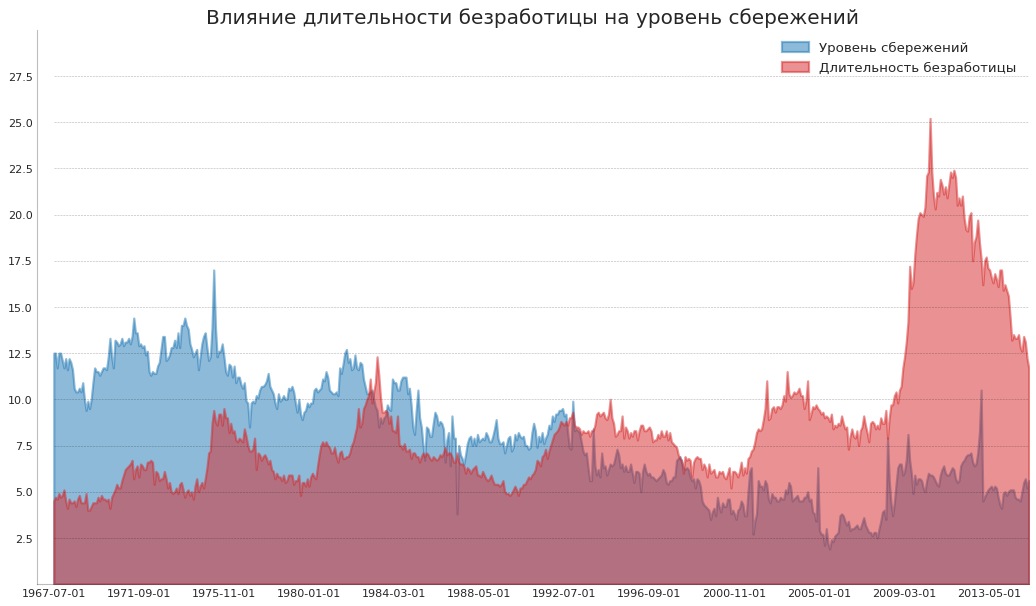

In [11]:
# берём исходные данные из файла
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

# готовим данные
x = df['date'].values.tolist()
# формируем сведения по сбережениям и безработице
y1 = df['psavert'].values.tolist()
y2 = df['uempmed'].values.tolist()
# цвета
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']   
# категории   
columns = ['Уровень сбережений', 'Длительность безработицы']

# готовим изображение
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
# добавляем графики сбережений и безработицы
ax.fill_between(x, y1=y1, y2=0, label=columns[0], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[1], alpha=0.5, color=mycolors[0], linewidth=2)

# добавляем общую подпись
ax.set_title('Влияние длительности безработицы на уровень сбережений', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
# добавляем числа на оси
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])

# рисуем горизонтальные линии
for y in np.arange(2.5, 30.0, 2.5):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# настраиваем внешний вид границ графика
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
# сохраняем изображение с графиком
plt.savefig('images/square_diagram.png')
# выводим график
plt.show()